<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/CottonDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!unzip '/content/data_cotton.zip'

Archive:  /content/data_cotton.zip
  inflating: data/val/fresh cotton plant/dsd (327)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (313)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (362)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (292)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (245)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (221)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (293)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (583)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (443)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (465)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (262)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (591)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (450)_iaip.jpg  
  inflating: data/val/fresh cotton plant/dsd (264)_iaip.jpg  
  inflating: data/test/diseased cotton plant/dd (706).jpg  
  inflating: data/val/fresh cotton pl

In [16]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [17]:
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [18]:
IMAGE_SIZE = [224,224]
train_path = '/content/data/train'
test_path = '/content/data/test'

In [19]:
resnet = ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [20]:
inceptionV3 = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [21]:
for layer in resnet.layers:
  layer.trainable = False

In [22]:
folders = glob('/content/data/train/*')

In [23]:
x = Flatten()(resnet.output)

In [24]:
prediction = Dense(len(folders), activation='softmax')(x)

# model = Model(inputs=resnet.input,outputs=prediction)
model = Model(inputs=resnet.input,outputs=prediction)

In [25]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [26]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
training_set = train_datagen.flow_from_directory('/content/data/train',
                                                 target_size = (224,224),
                                                 batch_size=32,
                                                 class_mode='categorical'
                                                 )

Found 1951 images belonging to 4 classes.


In [29]:
# Update test_set to exclude 'test data comp files'
test_set = test_datagen.flow_from_directory(
    '/content/data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']  # Specify only the desired classes
)


Found 18 images belonging to 4 classes.


In [30]:
print(training_set.class_indices)
print(test_set.class_indices)


{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [31]:
# Calculate steps based on batch size
batch_size = 1.005
steps_per_epoch = int(len(training_set) // batch_size)
validation_steps = int(len(test_set) // batch_size)

# Fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 607ms/step - accuracy: 0.3107 - loss: 4.7119 - val_accuracy: 0.3889 - val_loss: 1.5813
Epoch 2/20
 1/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5625 - loss: 1.3846

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5625 - loss: 1.3846 - val_accuracy: 0.3889 - val_loss: 1.6418
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 440ms/step - accuracy: 0.5666 - loss: 1.0572 - val_accuracy: 0.6111 - val_loss: 0.9149
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5000 - loss: 1.0453 - val_accuracy: 0.6111 - val_loss: 1.0138
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 39s 433ms/step - accuracy: 0.6837 - loss: 0.8614 - val_accuracy: 0.6111 - val_loss: 0.9641
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6250 - loss: 0.8541 - val_accuracy: 0.6111 - val_loss: 1.3425
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 403ms/step - accuracy: 0.6372 - loss: 1.0184 - val_accuracy: 0.7778 - val_loss: 1.0797
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6875 - loss: 1.0866 - val_accuracy: 0.6667 - val_loss: 1.0203
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 450ms/step - accuracy: 0.6434 - loss: 0.9059 - val_accuracy: 0.6667 - val_

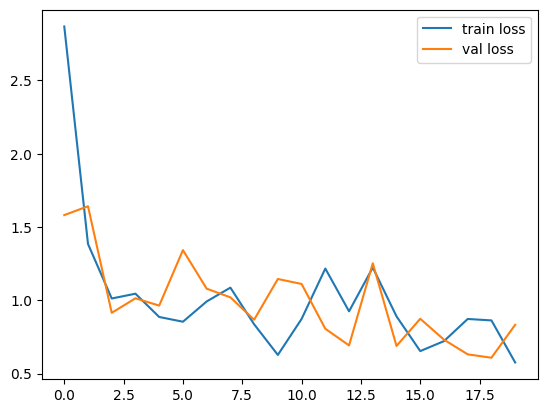

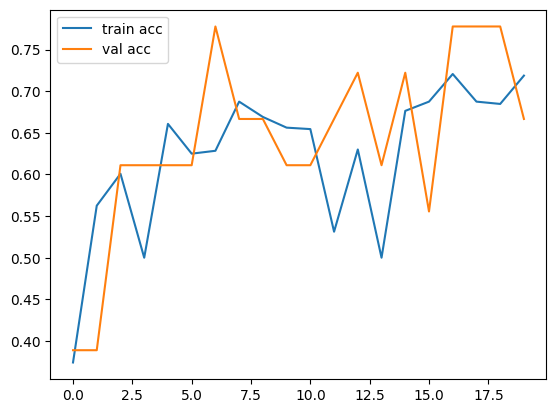

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [36]:
# Now use InceptionV3 as above like using resnet
# Import necessary libraries
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load InceptionV3 model without top layers (include_top=False)
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling to reduce dimensions
x = Dense(1024, activation='relu')(x)  # Fully connected layer
num_classes = 4  # Change to the number of classes in your dataset
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer

# Combine base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of InceptionV3 to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing using InceptionV3's preprocess_input
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # InceptionV3 specific preprocessing
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the training data from directory
train_generator = train_datagen.flow_from_directory(
    '/content/data/train',  # Replace with the path to your training data
    target_size=(299, 299),  # InceptionV3's expected input size
    batch_size=32,
    class_mode='categorical'
)

# Train the model
model.fit(train_generator, epochs=10, steps_per_epoch=train_generator.samples // train_generator.batch_size)

# Unfreeze some layers of InceptionV3 for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training (fine-tuning)
model.fit(train_generator, epochs=10, steps_per_epoch=train_generator.samples // train_generator.batch_size)


Found 1951 images belonging to 4 classes.
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 76s 859ms/step - accuracy: 0.5268 - loss: 2.0244
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.7500 - loss: 0.6671
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 652ms/step - accuracy: 0.8670 - loss: 0.4033
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.9062 - loss: 0.2485
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 83s 672ms/step - accuracy: 0.8968 - loss: 0.2834
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.9375 - loss: 0.2125
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 649ms/step - accuracy: 0.9161 - loss: 0.2474
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.9375 - loss: 0.1721
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 667ms/step - accuracy: 0.8929 - loss: 0.2604
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.8438 - loss: 0.3234
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 65s 739ms/step - accuracy: 0.7802 - loss: 0.5125
Epoch

In [37]:
# Save the fine-tuned model
model.save('cotton_disease_inceptionv3_finetuned_model.h5')

In [42]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

# Load the image and preprocess it
img_path = '/content/data/test/fresh cotton plant/dsd (600).jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(299, 299))  # Resize to InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess as required by InceptionV3

# Predict using the model
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the index of the highest probability

# Class labels based on your mapping
class_labels = {0: 'diseased cotton leaf', 1: 'diseased cotton plant', 2: 'fresh cotton leaf', 3: 'fresh cotton plant'}

# Get the predicted class name
predicted_class_name = class_labels[predicted_class_index]
print(f"Predicted class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: fresh cotton plant
